# Test the ENC-DEC model

In [1]:
import dataloader
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import models
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchvision
import os
import time
from torch_geometric.nn import GATv2Conv, global_mean_pool
# reload library
import importlib
import cv2
import utils as ut
import pandas as pd
import DataDLC

In [2]:
importlib.reload(dataloader)
importlib.reload(DataDLC)
importlib.reload(models)

<module 'models' from 'c:\\Users\\jalvarez\\Documents\\Code\\GitHubCOde\\Behavioral_Tagging_of_Mice_in_multiple_Mice_dataset_using_Deep_Learning\\src\\models.py'>

## Load dataset

**Obs:** This is just a test to see if the model is working.

In [6]:
importlib.reload(dataloader)
importlib.reload(DataDLC)

<module 'DataDLC' from 'c:\\Users\\jalvarez\\Documents\\Code\\GitHubCOde\\Behavioral_Tagging_of_Mice_in_multiple_Mice_dataset_using_Deep_Learning\\src\\DataDLC.py'>

In [7]:

dataloader.reload_module()

In [8]:
# deactivate warnings

import warnings
warnings.filterwarnings("ignore")


data_loader = dataloader.DLCDataLoader(r'c:\Users\jalvarez\Documents\Data\DataLoader_Baseline_models', batch_size=1, num_workers=0, device='cpu', window_size=5, stride = 1, build_graph=True)


['DMD_mal_Test_10DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5', 'DMD_mal_Test_11DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5', 'DMD_mal_Test_12DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5', 'DMD_mal_Test_13DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5', 'DMD_mal_Test_14DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5', 'DMD_mal_Test_15DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5', 'DMD_mal_Test_16DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5', 'DMD_mal_Test_17DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5', 'DMD_mal_Test_18DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5', 'DMD_mal_Test_19DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5', 'DMD_mal_Test_1DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5', 'DMD_mal_Test_20DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5', 'DMD_mal_Test_21

100%|██████████| 2628/2628 [02:51<00:00, 15.33it/s]


Loading file MDXCV_mal_Test_1DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2620/2620 [02:37<00:00, 16.66it/s]


Loading file DMD_mal_Test_2DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2633/2633 [02:43<00:00, 16.12it/s]


Loading file MDXCV_mal_Test_2DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2626/2626 [02:55<00:00, 15.00it/s]


Loading file DMD_mal_Test_3DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2630/2630 [03:02<00:00, 14.41it/s]


Loading file MDXCV_mal_Test_3DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2625/2625 [03:07<00:00, 13.99it/s]


Loading file DMD_mal_Test_4DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2627/2627 [02:57<00:00, 14.80it/s]


Loading file MDXCV_mal_Test_4DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2629/2629 [02:53<00:00, 15.12it/s]


Loading file DMD_mal_Test_5DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2626/2626 [02:43<00:00, 16.08it/s]


Loading file MDXCV_mal_Test_5DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2630/2630 [02:46<00:00, 15.77it/s]


Loading file DMD_mal_Test_6DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2632/2632 [02:48<00:00, 15.61it/s]


Loading file MDXCV_mal_Test_6DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2631/2631 [02:33<00:00, 17.18it/s]


Loading file DMD_mal_Test_7DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2613/2613 [02:32<00:00, 17.10it/s]


Loading file MDXCV_mal_Test_7DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2628/2628 [02:33<00:00, 17.11it/s]


Loading file DMD_mal_Test_8DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2647/2647 [02:34<00:00, 17.13it/s]


Loading file MDXCV_mal_Test_8DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2631/2631 [02:33<00:00, 17.11it/s]


Loading file DMD_mal_Test_9DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2626/2626 [02:35<00:00, 16.87it/s]


Loading file MDXCV_mal_Test_9DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2629/2629 [02:32<00:00, 17.22it/s]


Loading file DMD_mal_Test_10DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2626/2626 [02:32<00:00, 17.20it/s]


Loading file MDXCV_mal_Test_10DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2629/2629 [02:38<00:00, 16.57it/s]


Loading file DMD_mal_Test_11DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2622/2622 [02:38<00:00, 16.53it/s]


Loading file MDXCV_mal_Test_11DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2629/2629 [02:38<00:00, 16.58it/s]


Loading file DMD_mal_Test_12DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2630/2630 [02:38<00:00, 16.54it/s]


Loading file MDXCV_mal_Test_12DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2631/2631 [02:39<00:00, 16.54it/s]


Loading file DMD_mal_Test_13DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2628/2628 [02:38<00:00, 16.56it/s]


Loading file MDXCV_mal_Test_13DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2635/2635 [02:38<00:00, 16.60it/s]


Loading file DMD_mal_Test_14DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2619/2619 [02:39<00:00, 16.44it/s]


Loading file MDXCV_mal_Test_14DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2618/2618 [02:38<00:00, 16.50it/s]


Loading file DMD_mal_Test_15DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2641/2641 [02:39<00:00, 16.55it/s]


Loading file MDXCV_mal_Test_15DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2616/2616 [02:39<00:00, 16.44it/s]


Loading file DMD_mal_Test_16DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2645/2645 [02:39<00:00, 16.59it/s]


Loading file MDXCV_mal_Test_16DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2614/2614 [02:37<00:00, 16.56it/s]


Loading file DMD_mal_Test_17DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2632/2632 [02:37<00:00, 16.68it/s]


Loading file MDXCV_mal_Test_17DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2624/2624 [02:37<00:00, 16.69it/s]


Loading file DMD_mal_Test_18DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2621/2621 [02:42<00:00, 16.15it/s]


Loading file MDXCV_mal_Test_18DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2610/2610 [02:41<00:00, 16.14it/s]


Loading file DMD_mal_Test_19DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2650/2650 [02:45<00:00, 16.02it/s]


Loading file MDXCV_mal_Test_19DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2629/2629 [02:37<00:00, 16.64it/s]


Loading file DMD_mal_Test_20DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2624/2624 [02:37<00:00, 16.70it/s]


Loading file MDXCV_mal_Test_20DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2628/2628 [02:41<00:00, 16.27it/s]


Loading file DMD_mal_Test_21DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2634/2634 [02:47<00:00, 15.75it/s]


Loading file MDXCV_mal_Test_21DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2623/2623 [02:48<00:00, 15.59it/s]


Loading file DMD_mal_Test_22DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2629/2629 [02:47<00:00, 15.74it/s]


Loading file MDXCV_mal_Test_22DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2614/2614 [02:41<00:00, 16.18it/s]


Loading file DMD_mal_Test_23DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2610/2610 [02:33<00:00, 16.95it/s]


Loading file MDXCV_mal_Test_23DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2631/2631 [02:33<00:00, 17.19it/s]


Loading file DMD_mal_Test_24DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2625/2625 [02:34<00:00, 17.03it/s]


Loading file MDXCV_mal_Test_24DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2626/2626 [02:48<00:00, 15.58it/s]


Loading file DMD_mal_Test_25DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2641/2641 [03:02<00:00, 14.51it/s]


Loading file MDXCV_mal_Test_25DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2643/2643 [02:51<00:00, 15.38it/s]


Loading file DMD_mal_Test_26DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2622/2622 [02:43<00:00, 16.03it/s]


Loading file MDXCV_mal_Test_26DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2622/2622 [02:50<00:00, 15.36it/s]


Loading file DMD_mal_Test_27DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2626/2626 [02:56<00:00, 14.85it/s]


Loading file MDXCV_mal_Test_27DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2628/2628 [02:47<00:00, 15.73it/s]


Loading file DMD_mal_Test_28DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2627/2627 [02:51<00:00, 15.33it/s]


Loading file DMD_mal_Test_29DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2624/2624 [02:49<00:00, 15.48it/s]


Loading file DMD_mal_Test_30DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2643/2643 [02:49<00:00, 15.61it/s]


Loading file DMD_mal_Test_31DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2635/2635 [02:55<00:00, 15.02it/s]


Loading file DMD_mal_Test_32DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5


100%|██████████| 2627/2627 [02:52<00:00, 15.19it/s]

Number of files: 59


In [11]:
data_loader.save_dataset(r'c:\Users\jalvarez\Documents\Data\DataLoader_Baseline_models\dataset_w5.pt')

---

In [30]:
dataset = torch.load(r'c:\Users\jalvarez\Documents\Data\DataLoader_Baseline_models\dataset_w5.pt')

In [34]:
dataset

AttributeError: 'list' object has no attribute 'type'

In [35]:
# Class balance 
y = []
for i in range(len(dataset)):
    y.append(dataset[i].behaviour)

In [36]:
y[0][1]

0.0

In [37]:
contact = []

for i in range(len(y)):
    contact.append(y[i][1])
    

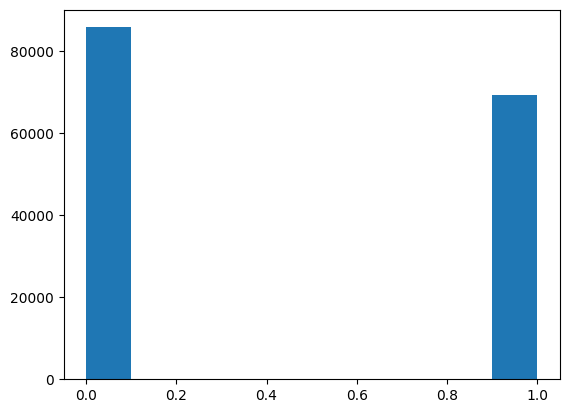

In [38]:
# Class balance 
plt.hist(contact)
plt.show()

## Create trainning/testing dataset

In [39]:
# Dataloader
from torch.utils.data import DataLoader

In [53]:
dataset

[Data(x=[180, 4], edge_index=[2, 3390], file='DMD_mal_Test_1DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5', frame_mask=[180], behaviour=Frames              2.0
 General_Contacts    0.0
 Sniffing_R          0.0
 Poursuit_R          NaN
 Dominance_R         NaN
 Rearing_R           0.0
 Grooming_R          0.0
 Sniffing_V          0.0
 Poursuit_V          0.0
 Dominance_V         0.0
 Rearing_V           0.0
 Grooming_V          0.0
 Name: 2, dtype: float64),
 Data(x=[180, 4], edge_index=[2, 3390], file='DMD_mal_Test_1DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5', frame_mask=[180], behaviour=Frames              3.0
 General_Contacts    0.0
 Sniffing_R          0.0
 Poursuit_R          NaN
 Dominance_R         NaN
 Rearing_R           0.0
 Grooming_R          0.0
 Sniffing_V          0.0
 Poursuit_V          0.0
 Dominance_V         0.0
 Rearing_V           0.0
 Grooming_V          0.0
 Name: 3, dtype: float64),
 Data(x=[180, 4], edge_index=[2, 3390], 

In [56]:
# mix the dataset
np.random.seed(0)
np.random.shuffle(dataset)

dataset

[Data(x=[180, 4], edge_index=[2, 3390], file='MDXCV_mal_Test_6DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5', frame_mask=[180], behaviour=Frames              567.0
 General_Contacts      1.0
 Sniffing_R            1.0
 Poursuit_R            0.0
 Dominance_R           0.0
 Rearing_R             0.0
 Grooming_R            0.0
 Sniffing_V            0.0
 Poursuit_V            0.0
 Dominance_V           0.0
 Rearing_V             0.0
 Grooming_V            0.0
 Name: 567, dtype: float64),
 Data(x=[180, 4], edge_index=[2, 3390], file='DMD_mal_Test_5DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000_el_filtered.h5', frame_mask=[180], behaviour=Frames              1542.0
 General_Contacts       0.0
 Sniffing_R             0.0
 Poursuit_R             NaN
 Dominance_R            NaN
 Rearing_R              0.0
 Grooming_R             0.0
 Sniffing_V             0.0
 Poursuit_V             0.0
 Dominance_V            0.0
 Rearing_V              0.0
 Grooming_V             0.0
 Na

In [57]:
batch_size = 16

# Split dataset
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size

train_dataset = dataset[:train_size]
test_dataset = dataset[train_size:]



In [61]:
len(train_dataset)

124033

In [62]:
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)



In [63]:
for a in train_loader:
    uno = a
    break

TypeError: default_collate: batch must contain tensors, numpy arrays, numbers, dicts or lists; found <class 'torch_geometric.data.data.Data'>

---

# Create Graphs

This will take a while, and i dont even know if it is going to work. jejeje

In [41]:
folder_path = 

SyntaxError: invalid syntax (3951515292.py, line 1)

### Graph Classifier

In [42]:
graphencoder = models.GATEncoder(nout = 64, nhid=16, attention_hidden=2, n_in=3, dropout=0.5)
class_head = models.ClassificationHead(n_latent = 576, nhid=64, nout=2)

In [43]:
model = models.GraphClassifier(graphencoder, class_head)

In [46]:
out = model.forward(train_loader[0])

TypeError: 'DataLoader' object is not subscriptable

In [ ]:
print(out.shape)

#### Trainning Loop

In [47]:
import tqdm

In [48]:
# Trainning loop
epochs = 50
lr = 0.005
optimizer = optim.Adam(model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()

for epoch in range(epochs):
    print(f'Epoch {epoch}')
    model.train()
    epoch_loss = 0
    for i, data in tqdm.tqdm(enumerate(train_loader)):
        optimizer.zero_grad()
        out = model.forward(data)
        loss = criterion(out, data.y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        if i % 10 == 0:
            print(f'Epoch {epoch}, iter {i}, loss {loss.item()}', end='\r')

    print(f'Epoch {epoch}, loss {epoch_loss/len(train_loader)}')

Epoch 0


0it [00:00, ?it/s]


TypeError: default_collate: batch must contain tensors, numpy arrays, numbers, dicts or lists; found <class 'torch_geometric.data.data.Data'>

In [ ]:
out = GraphAE.forward(data_loader.dataset[0].x, data_loader.dataset[0].edge_index, data_loader.dataset[0].frame_mask)

In [ ]:
# Loss and optimizer
loss = GraphAE.loss(data_loader.dataset[0].x, out)

In [ ]:
print(loss)

# Trainning loop

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
encoder = models.GATEncoder(nout = 64, nhid=16, attention_hidden=2, n_in=3, dropout=0.5).to(device)
print(encoder)
decoder = models.GATDecoder(n_latent=64, n_hidden=16, n_out=3).to(device)
print(decoder)
model = models.GraphAE(encoder, decoder).to(device)

optimizer = optim.Adam(model.parameters(), lr=1e-3)
data = data_loader.dataset

for epoch in range(100):
    model.train()
    optimizer.zero_grad()
    for i in range(len(data)):

        out = model(data[i].x.to(device), data[i].edge_index.to(device), data[i].frame_mask.to(device))
        loss = model.loss(data[i].x, out)
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch}, Loss {loss.item()}')

model.eval()
out = model(data[0].x, data[0].edge_index, data[0].frame_mask)

In [ ]:
print(out[0][0].shape)

In [ ]:
numpyout = out[0][0].detach().numpy()

In [ ]:
# Plot the output of the model, the first dimension are the points, and the second one is the x and y coordinates
plt.scatter(numpyout[:,0], numpyout[:,1])


In [ ]:
print(data_loader.dataset[0].x.shape)
print(x[0].shape)
print(x[1].shape)

In [ ]:
print(data_loader.dataset[0].x.shape)
print(x[0].shape)
print(x[1].shape)

In [ ]:
contacts = behaviour.iloc[:,1]

---

# Load trainned model

In [16]:
import numpy as np
import dataloader
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import models
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchvision
import os
import time
from torch_geometric.nn import GATv2Conv, global_mean_pool
# reload library
import importlib
import cv2
#import utils as ut
import pandas as pd
import DataDLC
from torch_geometric.data import Data, DataLoader
import tqdm


# PyTorch TensorBoard support
from torch.utils.tensorboard import SummaryWriter
from datetime import datetime

In [17]:
importlib.reload(models)

<module 'models' from 'c:\\Users\\jalvarez\\Documents\\Code\\GitHubCOde\\Behavioral_Tagging_of_Mice_in_multiple_Mice_dataset_using_Deep_Learning\\src\\models.py'>

In [18]:
# Load the model
def load_checkpoint(model, optimizer, path, device):
    checkpoint = torch.load(path, map_location=device)
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    epoch = checkpoint['epoch']
    loss = checkpoint['loss']
    print(f"Checkpoint loaded from {path}, at epoch {epoch}")
    return model, optimizer, epoch

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# Load the data
dataset = torch.load(r'c:\Users\jalvarez\Documents\Data\DataLoader_Baseline_models\dataset_w1.pkl', map_location=device)


cpu


NameError: name 'np' is not defined

In [10]:

# Suffle the dataset
np.random.seed(0)
np.random.shuffle(dataset)

# Split train and test
train_size = int(0.8 * len(dataset))


# Get only contact behaviour
for i in range(len(dataset)):
    dataset[i].behaviour = dataset[i].behaviour[0]

train_dataset = dataset[:train_size]
test_dataset = dataset[train_size:]

print('The train dataset has %d samples' % len(train_dataset))
print('The test dataset has %d samples' % len(test_dataset))



IndexError: invalid index of a 0-dim tensor. Use `tensor.item()` in Python or `tensor.item<T>()` in C++ to convert a 0-dim tensor to a number

In [19]:
batch_size = 200

# Create the dataloaders for train, validation and test
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define the model
# graphencoder = models.GATEncoder(nout = 64, nhid=32, attention_hidden=2, n_in=4, dropout=0.5)
# class_head = models.ClassificationHead(n_latent=64, nhid = 32, nout = 2)

model = models.SimpleMLPforGraph(n_in=144, n_hid=100, n_out=2)

model.to(device)

print('The model has %d trainable parameters' % sum(p.numel() for p in model.parameters() if p.requires_grad))


The model has 24802 trainable parameters


c:\Users\jalvarez\AppData\Local\anaconda3\envs\projenv\Lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [20]:
lr = 0.001
optimizer = optim.Adam(model.parameters(), lr=lr)


In [21]:
# Load the model
checkpoint_path = r'c:\Users\jalvarez\Documents\Experiments\Graph_Tail_nose_only\Checkpoints\MLP_baseline_graph_adapted\checkpoint_epoch_100.pth'
model, optimizer, start_epoch = load_checkpoint(model, optimizer, checkpoint_path, device)

Checkpoint loaded from c:\Users\jalvarez\Documents\Experiments\Graph_Tail_nose_only\Checkpoints\MLP_baseline_graph_adapted\checkpoint_epoch_100.pth, at epoch 100


In [22]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

model.eval()
y_true = []
y_pred = []

with torch.no_grad():
    for val_data in tqdm.tqdm(test_loader):
        val_outputs = model(val_data)
        val_labels = val_data.behaviour
        val_predicted = val_outputs.argmax(dim=1)
        y_true.extend(val_labels.tolist())
        y_pred.extend(val_predicted.tolist())

100%|██████████| 156/156 [00:14<00:00, 10.56it/s]


31056

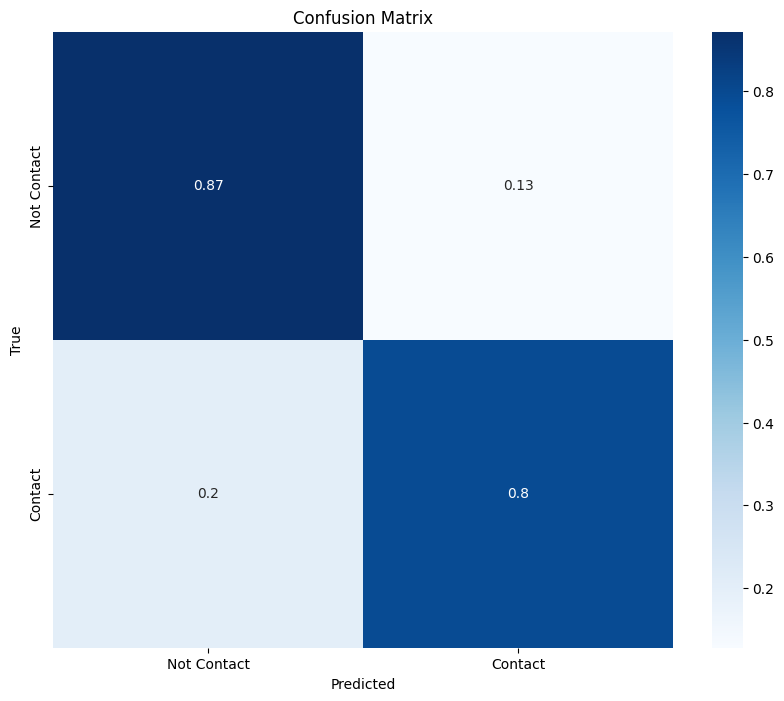

In [25]:
# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
# Percentage plot of the confusion matrix
cm = cm / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=['Not Contact', 'Contact'], yticklabels=['Not Contact', 'Contact'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

---

---

---

---

---

---

#### eDIT NAMES

In [23]:
path = r'c:\Users\jalvarez\Documents\Data\DEEPLABCUT_needs_this_folder_I_dont_like_dlc'

# replace ' ' by '_'
for filename in os.listdir(path):
    os.rename(os.path.join(path, filename), os.path.join(path, filename.replace(' ', '_')))

---

In [ ]:
start_time = time.time()  # Time the training
for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    correct = 0
    correct_class_0 = 0
    correct_class_1 = 0
    total_class_0 = 0
    total_class_1 = 0
    total = 0
    i = 0

    for data in tqdm.tqdm(train_loader):
        optimizer.zero_grad()
        outputs = model(data)
        labels = data.behaviour

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        predicted = outputs.argmax(dim=1)
        correct_class_0 += (predicted[labels == 0] == labels[labels == 0]).sum().item()
        correct_class_1 += (predicted[labels == 1] == labels[labels == 1]).sum().item()
        total_class_0 += (labels == 0).sum().item()
        total_class_1 += (labels == 1).sum().item()
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

        # Log training loss and accuracy at each step
        if i % 100 == 0:  # Log every 100 iterations, adjust as needed
            writer.add_scalar('Loss/Train', loss.item(), (actual_epoch + epoch) * len(train_loader) + i)
            writer.add_scalar('Accuracy/Train', correct / total, (actual_epoch + epoch) * len(train_loader) + i)
        i += 1

    train_accuracy = correct / total
    avg_train_loss = train_loss / len(train_loader)
    print(f"Epoch {epoch + actual_epoch + 1}, Training Loss: {avg_train_loss}, Training Accuracy: {train_accuracy}")

    # Validation phase
    model.eval()
    val_loss = 0
    correct = 0
    correct_class_0 = 0
    correct_class_1 = 0
    total_class_0 = 0
    total_class_1 = 0
    total = 0
    with torch.no_grad():
        for val_data in tqdm.tqdm(test_loader):
            val_outputs = model(val_data)
            val_labels = val_data.behaviour
            val_loss += criterion(val_outputs, val_labels).item()
            val_predicted = val_outputs.argmax(dim=1)
            correct_class_0 += (val_predicted[val_labels == 0] == val_labels[val_labels == 0]).sum().item()
            correct_class_1 += (val_predicted[val_labels == 1] == val_labels[val_labels == 1]).sum().item()
            total_class_0 += (val_labels == 0).sum().item()
            total_class_1 += (val_labels == 1).sum().item()
            correct += (val_predicted == val_labels).sum().item()
            total += val_labels.size(0)

    val_accuracy = correct / total
    avg_val_loss = val_loss / len(test_loader)

    print(f"Validation Loss: {avg_val_loss}, Validation Accuracy: {val_accuracy}") 

    # Log validation metrics
    writer.add_scalar('Name/%s' % name_behaviour, 0, actual_epoch + epoch)
    writer.add_scalar('Loss/Validation', avg_val_loss, actual_epoch + epoch)
    writer.add_scalar('Accuracy/Validation', val_accuracy, actual_epoch + epoch)
    writer.add_scalar('Accuracy/Avarage_inactive_class_Validation', correct_class_0 / total_class_0, actual_epoch + epoch)
    writer.add_scalar('Accuracy/Avarage_active_class_Validation', correct_class_1 / total_class_1, actual_epoch + epoch)
    writer.add_scalar('Accuracy/Average_per_class_Validation', ((correct_class_0 / total_class_0) + (correct_class_1 / total_class_1)) / 2, actual_epoch + epoch)
    # Metrics
    writer.add_scalar('Metrics/Validation/F1', metric_0(val_labels.cpu().numpy(), val_predicted.cpu().numpy()), actual_epoch + epoch)
    writer.add_scalar('Metrics/Validation/Matthews', metric_1(val_labels.cpu().numpy(), val_predicted.cpu().numpy()), actual_epoch + epoch)

    # Step the scheduler
    #scheduler.step()

    # Log learning rate
    current_lr = optimizer.param_groups[0]['lr']
    writer.add_scalar('Learning Rate', current_lr, actual_epoch + epoch)
    print(f"Learning Rate after epoch {epoch + 1}: {current_lr}")

    # Save checkpoint after each 5 epochs
    if (epoch + 1) % 10 == 0:
        checkpoint_path = os.path.join(checkpoint_dir, f'checkpoint_epoch_{epoch + actual_epoch + 1}.pth')
        save_checkpoint(model, optimizer, epoch + 1, avg_train_loss, checkpoint_path)

# Save the final model
if num_epochs % 5 != 0:
    checkpoint_path = os.path.join(checkpoint_dir, f'checkpoint_epoch_{epoch + actual_epoch + 1}.pth')
    save_checkpoint(model, optimizer, epoch + 1, avg_train_loss, checkpoint_path)

# Time the training
end_time = time.time()
print(f"Training took {end_time - start_time} seconds, for {num_epochs} epochs")
# Close the TensorBoard writer
writer.close()

print("Training finished")